It's week 2 on the 3MTT Deep Tech Specialization Course and I am going to be building a few models for an assignment. I will be building two, one from scratch and one from an already pre-trained model. The goal is to checkmate my current knowledge on model selection and evaluation, and also to get more comfortable working on model buildings with image dataset.
I will be using a dataset on boat images.
The task is to build deep learning models with Convolutional Neural Networks (CNNs) to classify images into classification (exmaples: gondola, motorboat, ferry).
I will be focusing on applying supervised learning to solve image classification problem.

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

print("Succesfully Completed Imports")

Succesfully Completed Imports


In [4]:
batch_size = 20
img_height = 180
img_width = 180
epochs = 20

In [5]:
# Next I'm importing my dataset

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os

data_dir = '/content/drive/MyDrive/boat_data/test'

print("Contents of boat data(test))", os.listdir(data_dir))
# print("Contents of test folder:", os.listdir(os.path.join(data_dir, 'test'))[:5])

Contents of boat data(test)) ['DBinfo.txt', 'VigilidelFuoco', 'VaporettoACTV', 'Water', 'Topa', 'Raccoltarifiuti', 'Sanpierota', 'Sandoloaremi', 'Mototopo', 'Patanella', 'Polizia', 'MotoscafoACTV', 'Motopontonerettangolare', 'Lanciamaggioredi10mMarrone', 'Lanciamaggioredi10mBianca', 'Motobarca', 'Lanciafino10mMarrone', 'Lanciafino10mBianca', 'Gondola', 'Lanciafino10m', 'Caorlina', 'Barchino', 'Alilaguna', 'Cacciapesca', 'Ambulanza']


In [7]:
# Next I will load dataset to train and validate set

# train_dir =os.path.join(data_dir, 'train')
# test_dir = os.path.join(data_dir, 'test')

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'training',
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 4774 files belonging to 24 classes.
Using 3820 files for training.


In [8]:
# I'm going to do the same code as above, only difference is I will be changing the training to validation and the train_ds to val_ds

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 4774 files belonging to 24 classes.
Using 954 files for validation.


In [9]:
class_names = train_ds.class_names
num_classes = len(class_names)
print("Number of classes:", num_classes)
print("Detected classes:", class_names)

Number of classes: 24
Detected classes: ['Alilaguna', 'Ambulanza', 'Barchino', 'Cacciapesca', 'Caorlina', 'Gondola', 'Lanciafino10m', 'Lanciafino10mBianca', 'Lanciafino10mMarrone', 'Lanciamaggioredi10mBianca', 'Lanciamaggioredi10mMarrone', 'Motobarca', 'Motopontonerettangolare', 'MotoscafoACTV', 'Mototopo', 'Patanella', 'Polizia', 'Raccoltarifiuti', 'Sandoloaremi', 'Sanpierota', 'Topa', 'VaporettoACTV', 'VigilidelFuoco', 'Water']


In [10]:
# Next I'll confirm the variables I just created are holding the right classes

train_ds.class_names

['Alilaguna',
 'Ambulanza',
 'Barchino',
 'Cacciapesca',
 'Caorlina',
 'Gondola',
 'Lanciafino10m',
 'Lanciafino10mBianca',
 'Lanciafino10mMarrone',
 'Lanciamaggioredi10mBianca',
 'Lanciamaggioredi10mMarrone',
 'Motobarca',
 'Motopontonerettangolare',
 'MotoscafoACTV',
 'Mototopo',
 'Patanella',
 'Polizia',
 'Raccoltarifiuti',
 'Sandoloaremi',
 'Sanpierota',
 'Topa',
 'VaporettoACTV',
 'VigilidelFuoco',
 'Water']

In [11]:
val_ds.class_names

['Alilaguna',
 'Ambulanza',
 'Barchino',
 'Cacciapesca',
 'Caorlina',
 'Gondola',
 'Lanciafino10m',
 'Lanciafino10mBianca',
 'Lanciafino10mMarrone',
 'Lanciamaggioredi10mBianca',
 'Lanciamaggioredi10mMarrone',
 'Motobarca',
 'Motopontonerettangolare',
 'MotoscafoACTV',
 'Mototopo',
 'Patanella',
 'Polizia',
 'Raccoltarifiuti',
 'Sandoloaremi',
 'Sanpierota',
 'Topa',
 'VaporettoACTV',
 'VigilidelFuoco',
 'Water']

In [12]:
# Optimizing my models performance

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
# Next, building my CNN Model from scratch

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential(
    [
    layers.Rescaling(1./255, input_shape =
                   (img_height, img_width, 3)),

    layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation = 'softmax')
    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# Next I will compile my model

model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics = ['accuracy'])

In [15]:
# Next i will be training my model

history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 374s 2s/step - accuracy: 0.3956 - loss: 2.2545 - val_accuracy: 0.6268 - val_loss: 1.3037
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.6474 - loss: 1.3169 - val_accuracy: 0.7453 - val_loss: 0.9135
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 316s 2s/step - accuracy: 0.7149 - loss: 0.9955 - val_accuracy: 0.7589 - val_loss: 0.8754
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 325s 2s/step - accuracy: 0.7478 - loss: 0.8945 - val_accuracy: 0.7736 - val_loss: 0.7931
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - accuracy: 0.7916 - loss: 0.7062 - val_accuracy: 0.7998 - val_loss: 0.7462
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 325s 2s/step - accuracy: 0.8261 - loss: 0.5813 - val_accuracy: 0.8019 - val_loss: 0.7343
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 337s 2s/step - accuracy: 0.8431 - loss: 0.4891 - val_accuracy: 0.8040 - val_loss: 0.7196
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 357s 2s/step - accuracy: 0.8692 - loss: 0.3862 - val_accu

The model learned fast but started to flop by memorizing the training data like a parrot. It was smart, but not wise. By adding data augmentation, batch normalization, and dropout early, it can learn to think, not just recall. Early stopping helps it stop when it should, and L2 regularization keeps it humble. This way, the model can be fair, steady, and ready for real-world data, not just classroom examples.

At epochs 9, we see the model at its best. I'll have to rework this model, include early stoppings, also make minor adjustments. I will be adding augmentation, batch norm, and dropout early to teache it to think, not memorize.

I'm going to visualize my findings to give a clearer picture and then proceed to testing this dataset on a pre-trained model to compare how both models perform.

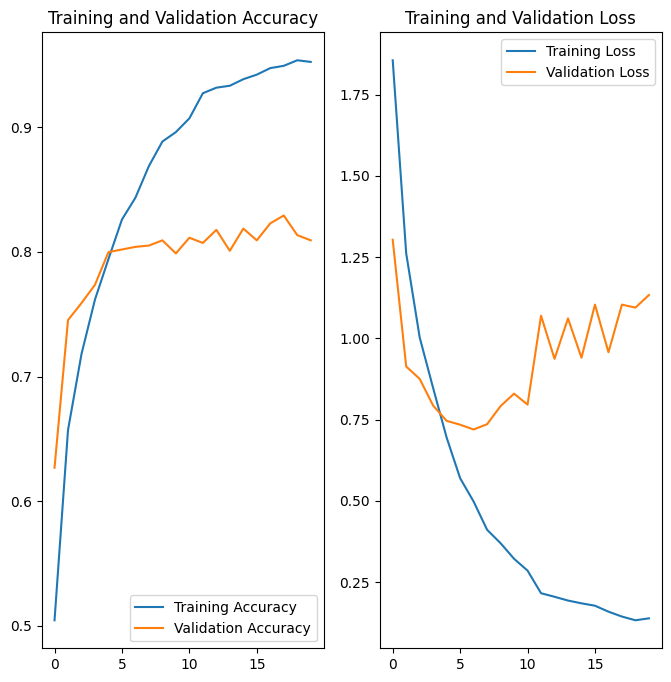

In [16]:
# Plotting the results

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

The chart above shows what we just concluded above. This is a case of overfitting.



I'll be building a new model using an already pre-trained model, and then feeding it our data to see how it performs. This is a test project.

In [27]:
model.save('my_model.keras')
print("Model saved successfully!")

Model saved successfully!


In [18]:
# Importing necessary libraries for pre-trained model

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
import os

print("Succesfully Completed Imports")

Succesfully Completed Imports


In [19]:
# Setting up the parameters

batch_size = 32
img_height = 180
img_width = 180
epochs = 35

In [20]:
# Loading the dataset

data_dir = '/content/drive/MyDrive/boat_data/test'

print("Contents of boat data(test))", os.listdir(data_dir))

Contents of boat data(test)) ['DBinfo.txt', 'VigilidelFuoco', 'VaporettoACTV', 'Water', 'Topa', 'Raccoltarifiuti', 'Sanpierota', 'Sandoloaremi', 'Mototopo', 'Patanella', 'Polizia', 'MotoscafoACTV', 'Motopontonerettangolare', 'Lanciamaggioredi10mMarrone', 'Lanciamaggioredi10mBianca', 'Motobarca', 'Lanciafino10mMarrone', 'Lanciafino10mBianca', 'Gondola', 'Lanciafino10m', 'Caorlina', 'Barchino', 'Alilaguna', 'Cacciapesca', 'Ambulanza']


In [21]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'training',
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 4774 files belonging to 24 classes.
Using 3820 files for training.


In [22]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 4774 files belonging to 24 classes.
Using 954 files for validation.


In [23]:
class_names = train_ds.class_names
num_classes = len(class_names)
print("Number of classes:", num_classes)
print("Detected classes:", class_names)

Number of classes: 24
Detected classes: ['Alilaguna', 'Ambulanza', 'Barchino', 'Cacciapesca', 'Caorlina', 'Gondola', 'Lanciafino10m', 'Lanciafino10mBianca', 'Lanciafino10mMarrone', 'Lanciamaggioredi10mBianca', 'Lanciamaggioredi10mMarrone', 'Motobarca', 'Motopontonerettangolare', 'MotoscafoACTV', 'Mototopo', 'Patanella', 'Polizia', 'Raccoltarifiuti', 'Sandoloaremi', 'Sanpierota', 'Topa', 'VaporettoACTV', 'VigilidelFuoco', 'Water']


In [24]:
# Preprocessing for MobileNetV2

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [25]:
# Building the base model

base_model = MobileNetV2(input_shape = (img_height, img_width, 3),
                         include_top = False,
                         weights = 'imagenet')

base_model.trainable = False

/tmp/ipython-input-190242377.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape = (img_height, img_width, 3),


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [30]:
# Building the new model

model = models.Sequential([
    layers.Input(shape = (img_height, img_width, 3)),
    layers.Rescaling(1./127.5, offset = -1),

    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation = 'softmax')
])

In [31]:
# Model compilation

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics = ['accuracy'])

In [32]:
# Finally, train model

history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/35
120/120 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - accuracy: 0.5439 - loss: 1.7428 - val_accuracy: 0.8124 - val_loss: 0.6115
Epoch 2/35
120/120 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.8184 - loss: 0.6136 - val_accuracy: 0.8627 - val_loss: 0.4664
Epoch 3/35
120/120 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.8553 - loss: 0.4662 - val_accuracy: 0.8742 - val_loss: 0.4126
Epoch 4/35
120/120 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.8825 - loss: 0.3898 - val_accuracy: 0.8721 - val_loss: 0.3968
Epoch 5/35
120/120 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.8903 - loss: 0.3417 - val_accuracy: 0.8868 - val_loss: 0.3745
Epoch 6/35
120/120 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.9036 - loss: 0.3009 - val_accuracy: 0.8899 - val_loss: 0.3618
Epoch 7/35
120/120 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.9228 - loss: 0.2511 - val_accuracy: 0.8962 - val_loss: 0.3424
Epoch 8/35
120/120 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.9230 - loss: 0.2446 - val_accu

Text(0.5, 1.0, 'Training and Validation Loss Pre-trained model')

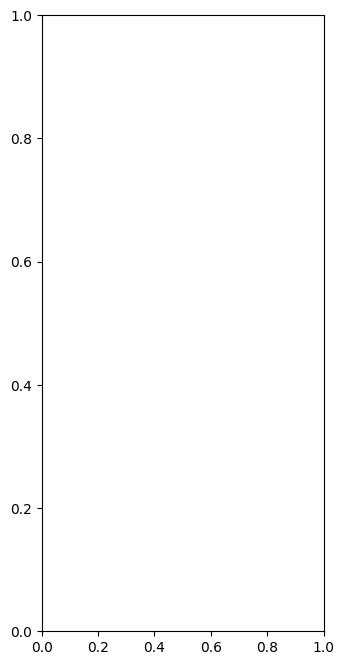

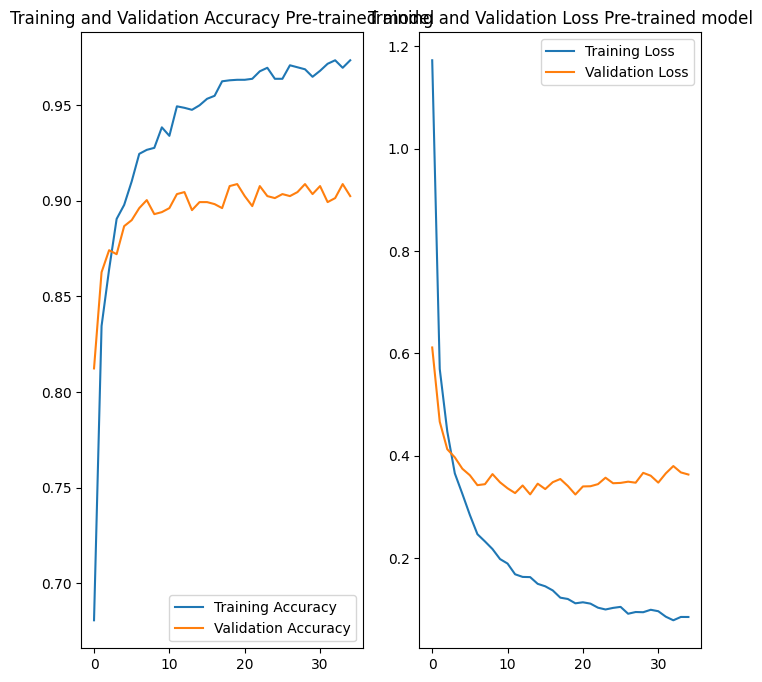

In [34]:
# Visualizing our findings

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Pre-trained model')

plt.subplot(1, 2, 2)
plt.plot(loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.legend()
plt.title('Training and Validation Loss Pre-trained model')

### 🧠 Model Performance Summary (Pre-trained Model)

The pre-trained model learned faster and gave stronger results, with training accuracy near 98% and validation around 90-91%. It picked up patterns quickly but began to memorize training data after about 20 epochs. Training loss kept dropping while validation loss flattened, showing mild overfitting. The model is solid but a bit too confident. EarlyStopping, slightly higher dropout, or L2 regularization can help it stay fair, balanced, and ready for real world data.

In [35]:
model.save('my_model.keras')
print("Model saved successfully!")

Model saved successfully!
